In [ ]:
# 설명 가능한 CNN(합성곱 네트워크(신경망)) - 190p
# 특성 맵을 통한 시각화

In [2]:
# 라이브러리
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2      # opencv-python 패키지  * %pip install opencv-python
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
# Sequential 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((100, 100, 3)),
    tf.keras.layers.Conv2D(activation='swish', kernel_size=(5, 5), filters=32),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='swish', kernel_size=(5, 5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='swish', kernel_size=(5, 5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='swish', kernel_size=(5, 5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='swish'),
    tf.keras.layers.Dense(64, activation='swish'),
    tf.keras.layers.Dense(32, activation='swish'),
    tf.keras.layers.Dense(2, activation='swish'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 18, 18, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301,952 (1.15 MB)

 Trainable params: 301,952 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 특성 맵 정의
# 층간 변화를 보기 위한 모델 - feature_map을 이용한 확인        *feature_map : 특성 맵
ins = model.inputs      # model(합성곱 네트워크 모델) 입력층
outs = model.layers[0].output   # model 첫 번째 Layer(층) 출력
# 중간 처리 과정을 확인하기 위해 Functional 모델 생성
feature_map = Model(inputs=ins, outputs=outs)
feature_map.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 96, 96, 32)     │         2,432 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,432 (9.50 KB)

 Trainable params: 2,432 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

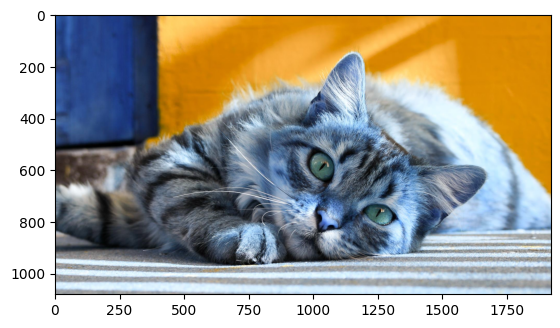

In [5]:
# 이미지 호출
img = cv2.imread('./data/cat.jpg')    # 이미지 파일을 읽어서 array 형태의 데이터 반환
plt.imshow(img)    # 데이터를 읽어서 이미지 처리하여 보여줌

(1, 100, 100, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


d:\kim\TensorFlow\venv\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 100, 100, 3))
  warnings.warn(msg)


(1, 96, 96, 32)


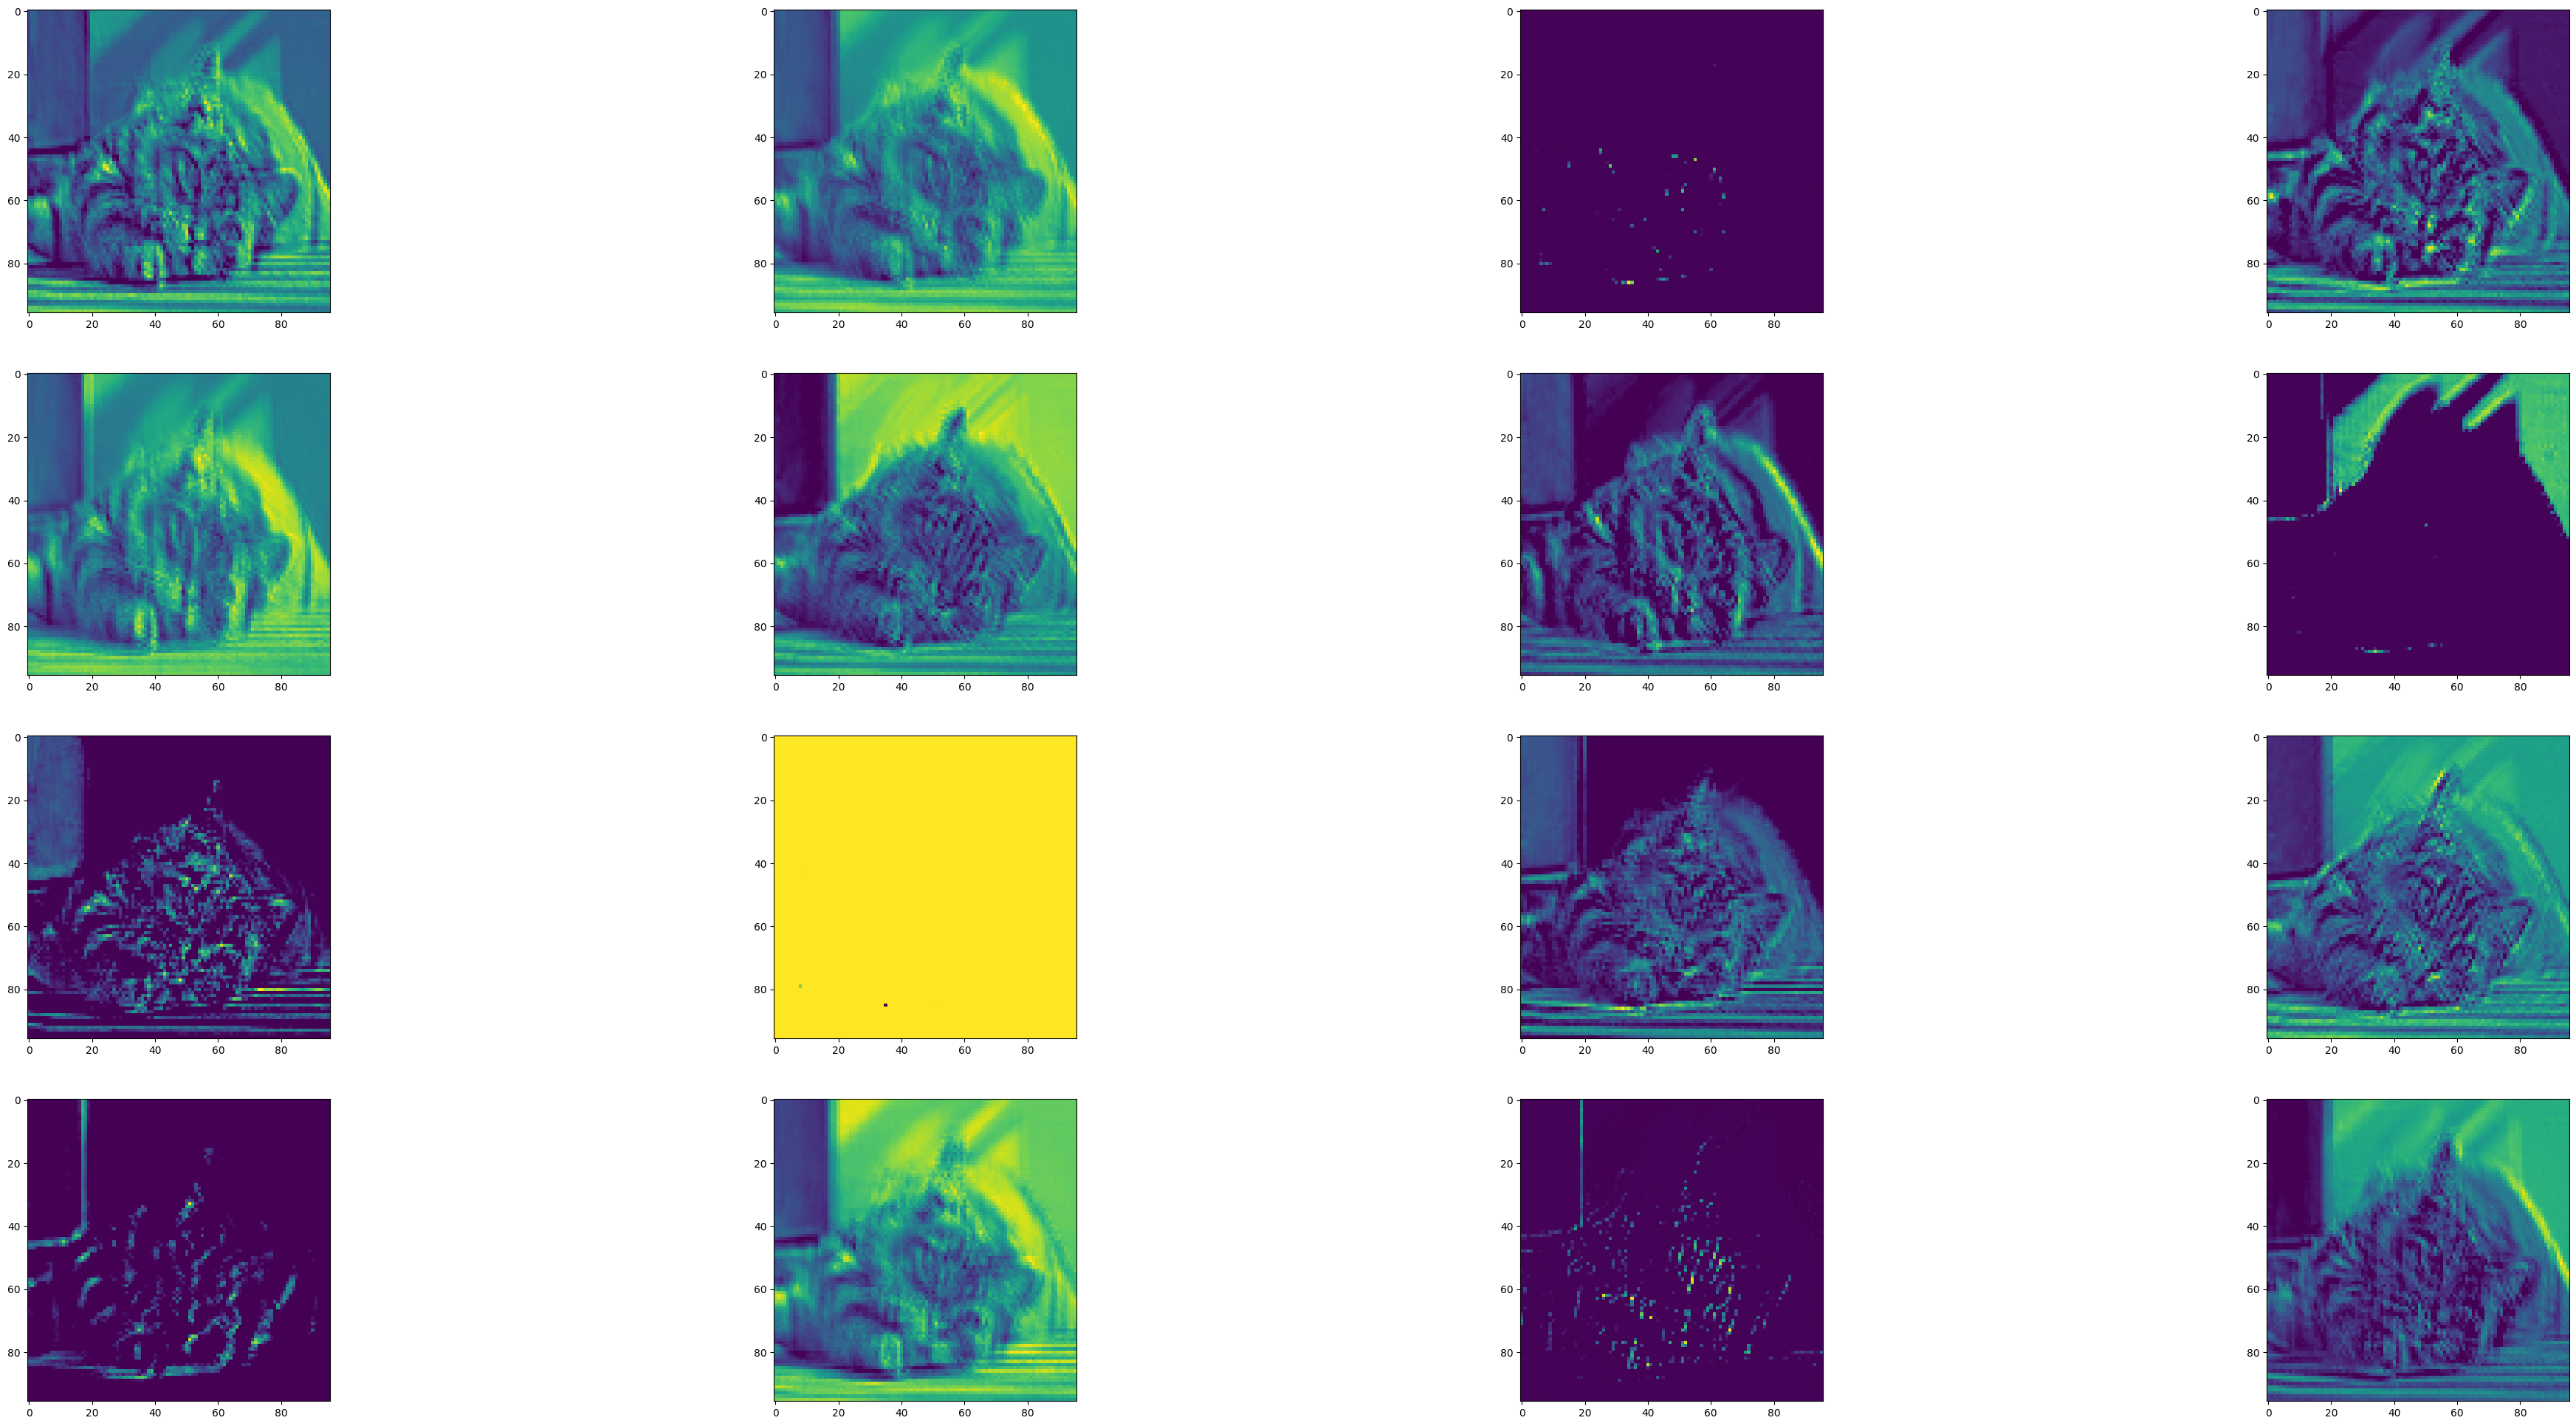

In [6]:
# 이미지 전처리 및 특성 맵 확인
"""
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                    ┃ Output Shape                             ┃       Param #            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)                           │ (None, 100, 100, 3)                    │             0                   │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                                          │ (None, 96, 96, 32)                    │         2,432               │
└─────────────────────────────────┴────────────────────────┴───────────────┘
"""
# 사이즈 맞추는 작업
img = cv2.resize(img, (100, 100))
# 차원 확장
input_img = np.expand_dims(img, axis=0)
print(input_img.shape)

feature = feature_map.predict(input_img)
print(feature.shape)
fig = plt.figure(figsize=(50, 50))
for i in range(16):
    plt.subplot(8, 4, i+1)
    plt.imshow(feature[0, :, :, i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


d:\kim\TensorFlow\venv\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_2']
Received: inputs=Tensor(shape=(1, 100, 100, 3))
  warnings.warn(msg)


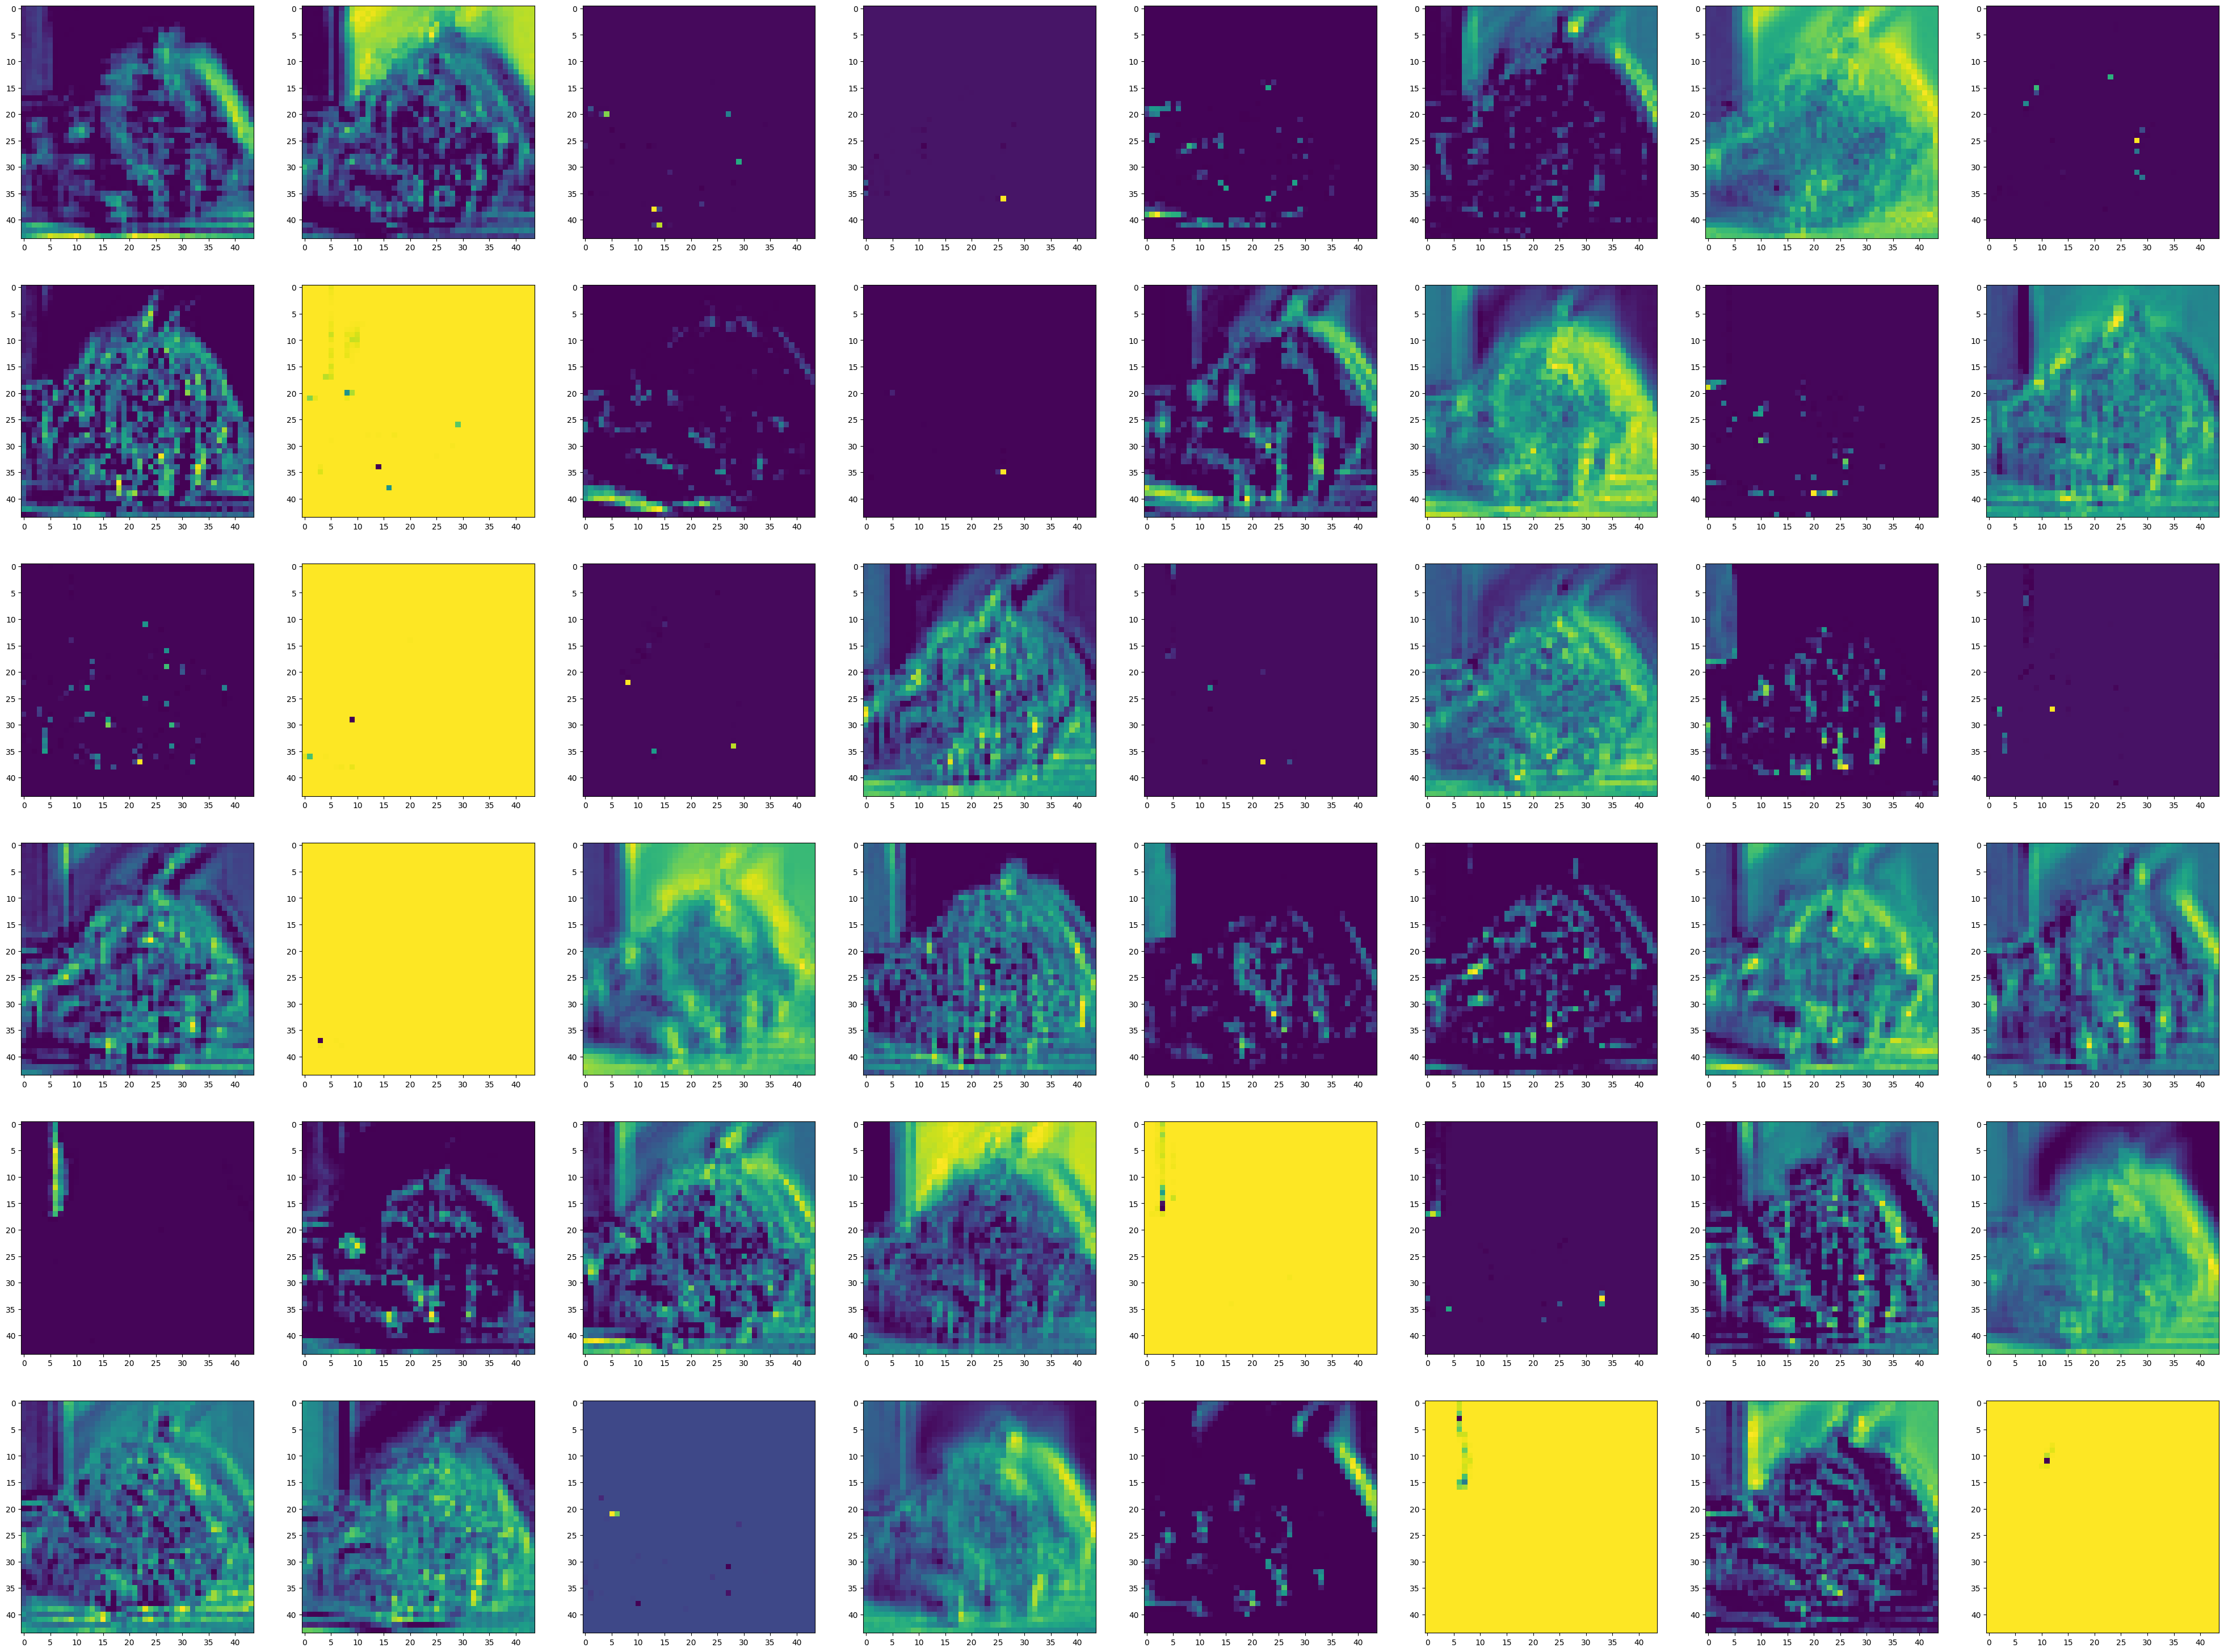

In [10]:
# 이미지를 모델에 적용
ins = model.inputs
outs = model.layers[2].output
feature_map = Model(inputs=ins, outputs=outs)

img = cv2.imread('./data/cat.jpg')
img = cv2.resize(img, (100, 100))
input_img = np.expand_dims(img, axis=0)

# 모델 예측 작업
feature = feature_map.predict(input_img)
fig = plt.figure(figsize=(50, 50))
for i in range(48):
    plt.subplot(8, 8, i+1)
    plt.imshow(feature[0, :, :, i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


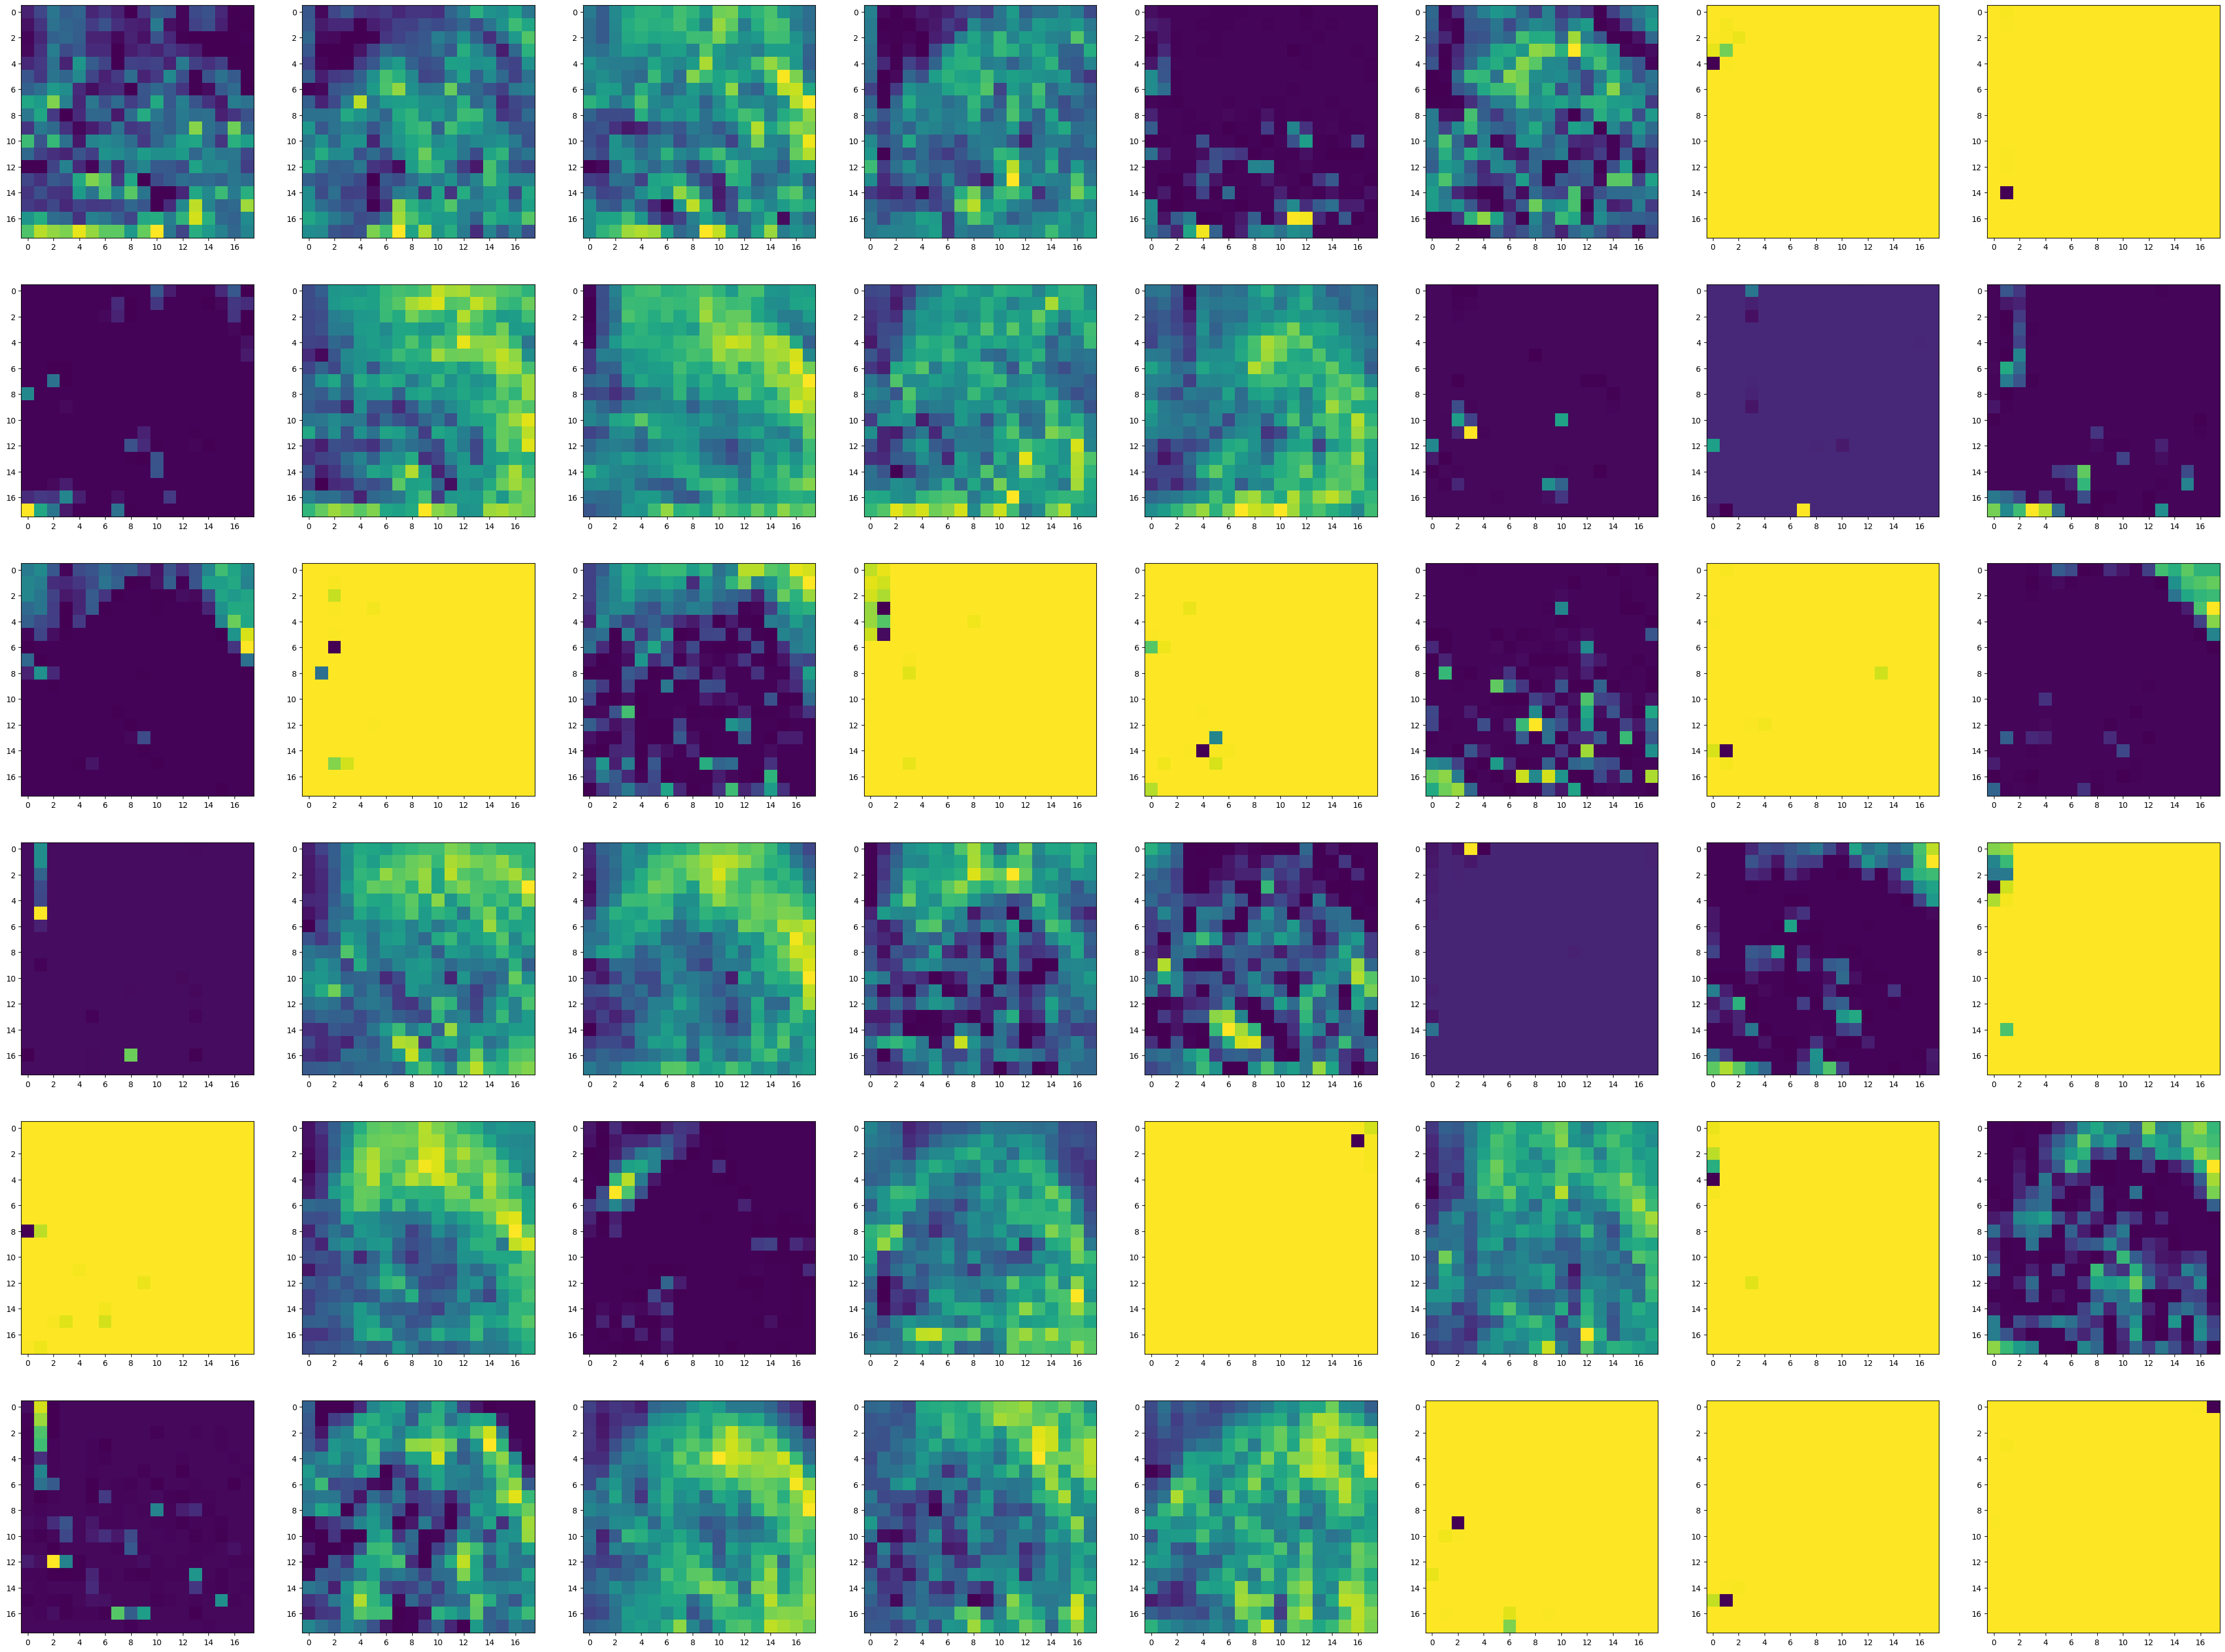

In [9]:
# 이미지를 모델에 적용
ins = model.inputs
outs = model.layers[4].output
feature_map = Model(inputs=ins, outputs=outs)

img = cv2.imread('./data/cat.jpg')
img = cv2.resize(img, (100, 100))
input_img = np.expand_dims(img, axis=0)

# 모델 예측 작업
feature = feature_map.predict(input_img)
fig = plt.figure(figsize=(50, 50))
for i in range(48):
    plt.subplot(8, 8, i+1)
    plt.imshow(feature[0, :, :, i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


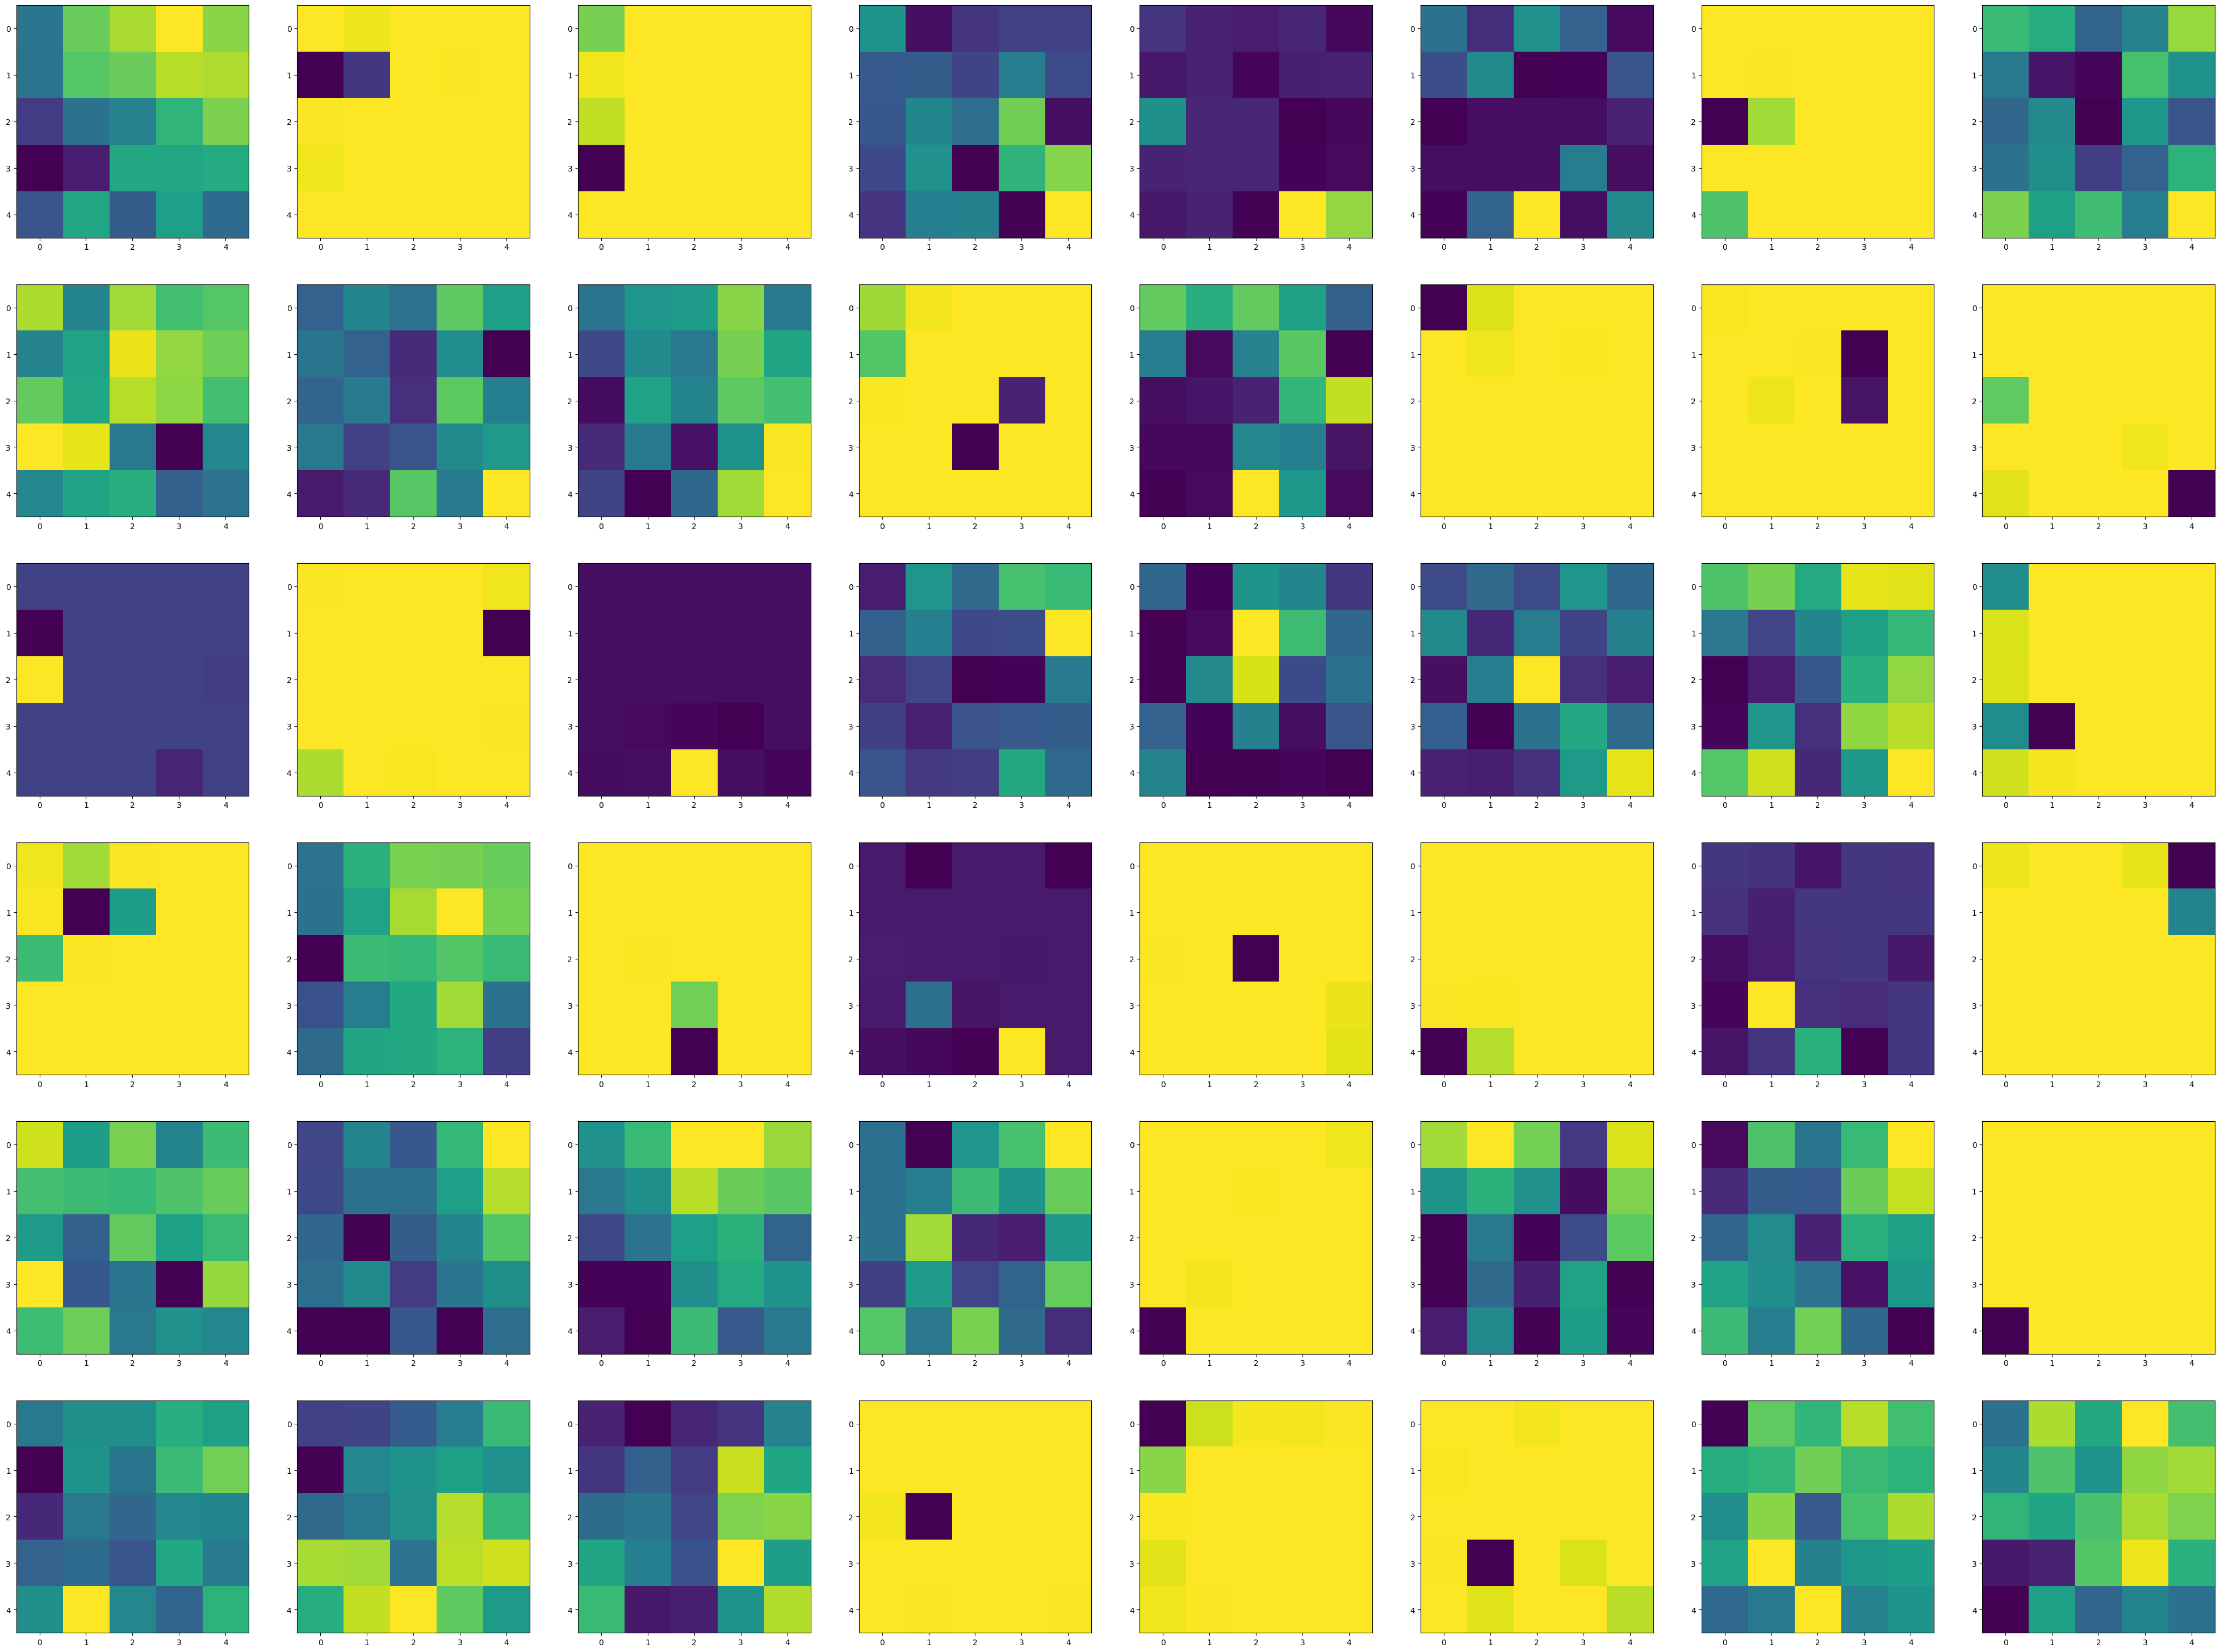

In [10]:
# 이미지를 모델에 적용
ins = model.inputs
outs = model.layers[6].output
feature_map = Model(inputs=ins, outputs=outs)

img = cv2.imread('./data/cat.jpg')
img = cv2.resize(img, (100, 100))
input_img = np.expand_dims(img, axis=0)

# 모델 예측 작업
feature = feature_map.predict(input_img)
fig = plt.figure(figsize=(50, 50))
for i in range(48):
    plt.subplot(8, 8, i+1)
    plt.imshow(feature[0, :, :, i])